In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from google.colab import files
import tensorflow as tf
import math
#import sympy as sym
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import metrics

import random
import csv

In [2]:
#['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
#   0     1       2           3           4          5            6        7      8           9        10      11          12         13      14           15         16
job=['unknown','admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed']
marital=['unknown','divorced','married','single']
education=['unknown','primary','secondary','tertiary']
default=['unknown','no','yes']
housing=['unknown','no','yes']
loan=['unknown','no','yes']
contact=['unknown','cellular','telephone']
month=['unknown','jan', 'feb', 'mar', 'apr', 'may','jun','jul','aug','sep','oct', 'nov', 'dec']
day_of_week=['unknown','mon','tue','wed','thu','fri']
poutcome=['unknown','failure','success','other']
y=['no','yes']

def indexConverter(lst, string):
    return lst.index(string)
def indexReveser(lst, index):
    return lst[index]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               2176      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
Total params: 27,074
Trainable params: 27,074
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
989/989 [==============================] - 1s 568us/step - loss: 3.3448 - binary_accuracy: 0.8226
Epoch 2/2000
989/989 [==============================] - 1s 571us/step - loss: 0.5846 - binary_accuracy: 0.8626
Epoch 3/2000
989/989 [======

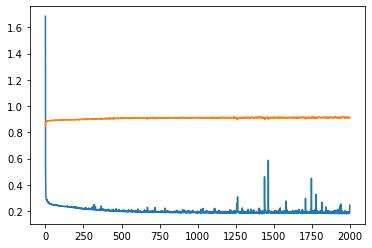

In [3]:
dataList=[]
with open('bank-full.csv', 'r') as file:
    reader = csv.reader(file,delimiter=';')
    for row in reader:
        #print(row)
        dataList.append(row)

#print(dataList[0])
dataList.pop(0)
#print(dataList)
random.shuffle(dataList)# this is for random pick
# print(dataList)

# for i in range(len(dataList)):
#     print(dataList[i][3])


features=[]
correctAnswer=[]

#collect the features
for i in range(len(dataList)):
    features.append([])
    features[-1].append(float(dataList[i][0]))
    features[-1].append(indexConverter(job, dataList[i][1]))
    features[-1].append(indexConverter(marital, dataList[i][2]))
    features[-1].append(indexConverter(education, dataList[i][3]))
    features[-1].append(indexConverter(default ,dataList[i][4]))
    features[-1].append(float(dataList[i][5]))
    features[-1].append(indexConverter(housing, dataList[i][6]))
    features[-1].append(indexConverter(loan, dataList[i][7]))
    features[-1].append(indexConverter(contact, dataList[i][8]))
    features[-1].append(float(dataList[i][9]))
    features[-1].append(indexConverter(month,dataList[i][10]))
    features[-1].append(float(dataList[i][11]))
    features[-1].append(float(dataList[i][12]))
    features[-1].append(float(dataList[i][13]))
    features[-1].append(float(dataList[i][14]))
    features[-1].append(indexConverter(poutcome,dataList[i][15]))
        
#print(features)

#collect the Answers
for i in range(len(dataList)):
    #correctAnswer.append(indexConverter(y,dataList[i][-1]))
    if indexConverter(y,dataList[i][-1])==0:
        correctAnswer.append([1,0])
    else:
        correctAnswer.append([0,1])
#print(correctAnswer) 


#Ok, let's first 70% of the set for training and last 30% for testing
trainingIndex=int(0.7*len(features))

#print(len(features),trainingIndex)

featuresNp=np.array(features)
#print(featuresNp)
correctAnswerNp=np.array(correctAnswer)
# for val in correctAnswerNp:
#     print(val, end=' ')

model = keras.Sequential()
# input layer
model.add(keras.layers.Dense(units = 128, activation = 'relu', input_shape=(16,)))

# ........ Add as many dense layer as you want (one is added for you) ............
model.add(keras.layers.Dense(units = 128, activation = 'relu'))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
# model.add(keras.layers.Dense(units = 64, activation = 'relu'))

# output layer
model.add(keras.layers.Dense(units = 2, activation = 'sigmoid'))

# compile model with loss function and optimizier
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=[keras.metrics.binary_accuracy])


model.summary()


history=model.fit(featuresNp[:trainingIndex], correctAnswerNp[:trainingIndex], epochs=2000, verbose=1)#batch_size=32

plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["binary_accuracy"])
plt.show()

In [5]:
pred=model.predict(featuresNp[trainingIndex:])


print(len(pred),len(correctAnswerNp[trainingIndex:]))

# for val in pred:
#     print(val, end=' ')
print(pred[-3:],'\n', correctAnswerNp[-3:],'\n', featuresNp[-3:],'\n',dataList[-3:])

hits=0

ii=0
for i in range(trainingIndex, len(correctAnswerNp)):
    if pred[ii][1]>=pred[ii][0]:
        if correctAnswerNp[i][1]==1:
            hits+=1
    else:
        if correctAnswerNp[i][0]==1:
            hits+=1
    
    ii+=1
    
print(hits/len(pred))

13564 13564
[[9.80512321e-01 1.92375183e-02]
 [9.99876022e-01 1.19179516e-04]
 [4.69948024e-01 5.30728638e-01]] 
 [[1 0]
 [1 0]
 [0 1]] 
 [[ 4.7000e+01  2.0000e+00  2.0000e+00  0.0000e+00  1.0000e+00  2.4580e+03
   1.0000e+00  1.0000e+00  1.0000e+00  2.4000e+01  7.0000e+00  1.7200e+02
   3.0000e+00 -1.0000e+00  0.0000e+00  0.0000e+00]
 [ 5.8000e+01  2.0000e+00  2.0000e+00  1.0000e+00  1.0000e+00  1.3570e+03
   2.0000e+00  1.0000e+00  0.0000e+00  1.3000e+01  5.0000e+00  1.5000e+02
   2.0000e+00 -1.0000e+00  0.0000e+00  0.0000e+00]
 [ 3.4000e+01  5.0000e+00  3.0000e+00  3.0000e+00  1.0000e+00  1.3014e+04
   1.0000e+00  1.0000e+00  1.0000e+00  1.2000e+01  2.0000e+00  6.3700e+02
   1.0000e+00  1.8300e+02  1.0000e+00  2.0000e+00]] 
 [['47', 'blue-collar', 'married', 'unknown', 'no', '2458', 'no', 'no', 'cellular', '24', 'jul', '172', '3', '-1', '0', 'unknown', 'no'], ['58', 'blue-collar', 'married', 'primary', 'no', '1357', 'yes', 'no', 'unknown', '13', 'may', '150', '2', '-1', '0', 'unknow